<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Q-learning</center></span>

<center>Ecuación de Belman</center>

##   <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span>

1. [Alvaro Montenegro y Daniel Montenegro, Inteligencia Artificial y Aprendizaje Profundo, 2021](https://github.com/AprendizajeProfundo/Diplomado)
1. [Maxim Lapan, Deep Reinforcement Learning Hands-On: Apply modern RL methods to practical problems of chatbots, robotics, discrete optimization, web automation, and more, 2nd Edition, 2020](http://library.lol/main/F4D1A90C476A576238E8FE1F47602C67)
1. [Richard S. Sutton, Andrew G. Barto, Reinforcement learning: an introduction, 2nd edition, 2020](http://library.lol/main/6502B74CE247C4CD4D4FB54747AD7C7E)
1. [Praveen Palanisamy - Hands-On Intelligent Agents with OpenAI Gym_ Your Guide to Developing AI Agents Using Deep Reinforcement Learning, 2020](http://library.lol/main/E4FD128CF9B93E0F7A542B053330517A)
1.[Markel Sanz, Introducción al aprendizaje por refuerzo](https://medium.com/@markelsanz14/introducci%C3%B3n-al-aprendizaje-por-refuerzo-parte-2-q-learning-883cd42fb48e)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Función de valor](#Función-de-valor)
* [Q-Learning](#Q-Learning)
* [Ecuación de Bellman](#Ecuación-de-Bellman)
* [Valor de la acción](#Valor-de-la-acción)
* [Algortimo Q-learning determinístico](Algortimo-Q-learning-determinístico)
* [Método de iteración de valores en práctica](#Método-de-iteración-de-valores-en-práctica)
* [Método de iteración de acciones en práctica](#Método-de-iteración-de-acciones-en-práctica)


## <span style="color:blue">Introducción</span>

En la lección del bandido multibrazo, hemos descrito el problema del bandido multibrazo, y hemos introducido varios conceptos, como el estado, la acción, la recompensa, etc. Sin embargo, el problema del bandido multibrazo no representa el problema completo del aprendizaje reforzado. En los problemas de bandidos multibrazo, cada acción es completamente independiente de las anteriores, y el estado siempre es el mismo, como en el ejemplo de la lección del bandido multibrazo, donde siempre teníamos los 5 mismos brazos y su probabilidad de éxito no cambiaba en ningún momento.


En el problema completo de aprendizaje por refuerzo, el estado cambia cada vez que ejecutamos una acción. Podemos representar el problema general de aprendizaje reforzado de la siguiente manera. 

1. El **agente** recibe la siguiente observación(que llamaremos estados en esta lección) del  **ambiente** (environment). los estados se denotaran por $s_i$
2. El agente ejecuta entonces la **acción** que elija y le informa ambiente. Las acciones de denotaran $a_i$
3. Al ejecutar esa acción, el ambiente responde proporcionando una **recompensa** y una nueva observación que llamaremos estado en esta lección. La recompensas se denotarán $r_i$.

Este ciclo se puede observar en la siguiente imagen.



<figure>
<img src="../Imagenes/environment.png" width="600" height="600" align="center"/>
</figure> 

Fuente: Alvaro Montenegro

Por lo tanto, **la acción que el agente escoja no debe sólo depende de la recompensa  que vaya a recibir a corto plazo. Debe elegir las acciones que a largo plazo le traerán la máxima recompensa (o retorno) posible en todo el episodio (episode)**. 

Este ciclo trae una secuencia de estados, acciones y recompensas, desde el primer paso del ciclo hasta el último: 

$$
s_1, a_1, r_1; s_2, a_2, r_2; \ldots; s_T, a_T, r_T. 
$$

Aquí, $T$ indica el fin del episodio.

## <span style="color:blue">Función de valor</span>

Para cuantificar cuanta recompensa obtendrá el agente a largo plazo desde cada estado, introducimos la función de valor $V(s)$. Esta función produce una estimación de la recompensa que obtendrá el agente hasta el final del episodio, empezando desde el estado s. Si conseguimos estimar este valor correctamente, podremos decidir ejecutar la acción que nos lleve al estado con el valor más alto.

## <span style="color:blue">Q-Learning</span>

Para resolver el problema del aprendizaje reforzado, el agente debe aprender a escoger la mejor acción posible para cada uno de los estados posibles. Para ello, con el algoritmo **Q-Learning** el agente intenta aprender cuanta recompensa obtendrá a largo plazo para cada pareja de estados y acciones $(s,a)$. 

A esa función se la llama la **función de acción-valor** (action-value function) y este algoritmo la representa como la función $Q(s,a)$, la cual devuelve la recompensa que el agente recibirá al ejecutar la acción a desde el estado $s$, y asumiendo que seguirá la misma política dictada por la función $Q$ hasta el final del episodio. 


Por lo tanto, si desde el estado $s$, tenemos dos acciones disponibles, $a_1$ y $a_2$, la función $Q$ nos proporcionará los **valores-Q** (Q-values) de cada una de las acciones. Por ejemplo, si $Q(s,a_1)=1$ y $Q(s,a_2)=4$, el agente sabe que la acción $a_2$ es mejor y le traerá mayor recompensa, por lo que será la acción que ejecutará, una vez haya sido entrenado.

## <span style="color:blue">Ecuación de Bellman</span>

Recordemos del capítulo de [introducción al aprendizaje reforzado](ar_Aprendizaje_Reforzado_Intro.ipynb)  que definimos el  `valor del estado` *s* como

$$
V(s) = E\left[\sum_{t=0}^{\infty}r\gamma^t \right],
$$

en donde $r_t$ es la recompensa local obtenida en el paso $t$ del episodio y $\gamma$ el factor de descuento. El valor es calculado  de acuerdo con una política que el agente sigue en el entrenamiento.



<figure>
<img src="../Imagenes/dos_estados.png" width="150" height="150" align="right"/>
</figure>


Consideremos el siguiente ejemplo simple. El ambiente tiene tres estados:

1. El estado inicial del agente.
1. El estado final que se encuentra al ejecutar la acción *derecha* desde el estado inicial. La recompensa recibida al alcanzar este estado es 1.
1. El estado final que se encuentra al ejecutar la acción *abajo* desde el estado inicial. La recompensa recibida al alcanzar este estado es 2.

Fuente Maxim Lapan

En este ejemplo el ambiente es determinístico: Toda acción sucede y siempre empieza en el estado 1. Una vez se alcanza el esto 2 o el estado 3 el episodio termina. La pregunta es ¿Cuál es el valor del estado 1?.

Esta pregunta carece de significado sin la información acerca del comportamiento (política) del agente. Aún en este ejemplo tan simple, el agente puede tener una gran cantidad de comportamientos. Por ejemplo:

* El agente siempre va  la derecha.
* El agente siempre va a abajo.
* El agente va a la derecha o baja con probabilidad 50\% en cada caso.
* El agente va ala derecha con probabilidad 10\% y baja con probabilidad 90\%.

El valor del estado 1 en cada caso es

* siempre a la derecha: 1.
* Siempre baja: 2.0
* 50\% y 50\%: 1.0\*0.5 +2.0\*0.5 = 1.5.
* Para el último caso, el valor del estado 1 es: 1.0\*0.1 + 2.0\*0.9 = 1.9

### Pregunta

¿Cuál es la política optimal para este agente?

Como el propósito de los agentes en el AR es obtener la máxima recompensa, en este caso, la política optimal es siempre bajar. Sin embargo una caso tan simple como este, no es de interés práctico.

### Observación

El ejemplo da la impresión de que el agente debe tomar siempre la siguiente acción que le entrega mayor recompensa inmediata. El asunto no es tan sencillo.

Veamos el siguiente ejemplo.


<figure>
<img src="../Imagenes/cuatro_estados.png" width="150" height="150" align="right"/>
</figure>

Como se observa, siempre empezando en el estado 1, el siguiente estado que ofrece mayor recompensa es el estados 3, con recompensa=2. Pero  el agente solamente puede continuar para terminar el episodio hacia el estado en donde recibe recompensa= -20. 




Por lo que que final del episodio, por este camino recibe una recompensa total de -18. Por el otro camino, la recompensa al terminar el episodio es 1.0.

Fuente: Maxim Lapan

### Ejercicio

Calcule el valor del estado 1, para las siguientes políticas:

* Siempre a la derecha.
* Siempre abajo.
* 50% y 50%.
* 10\% derecha y 90% abajo.

### Ecuación de optimalidad de Bellman para el caso determinístico

Para llegar a la ecuación de Bellman, vamos a hacerlo por pasos. Examine el siguiente diagrama.

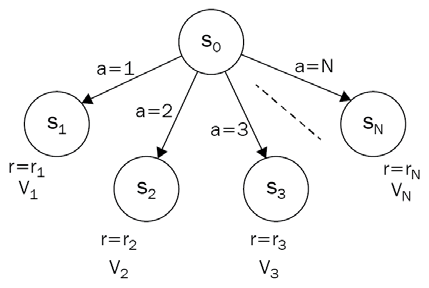

El agente observa el estado $s_0$ y tiene $N$ acciones disponibles que lo pueden llevar a los estados $s_1,\ldots, s_N$ con respectivas recompensas $r_1,\ldots, r_N$. Supongamos además que conocemos el valor $V_i$ de los estados conectados. ¿Cuál es el mejor camino a seguir para el agente?

Observe que si el agente escoge la acción $a_i$, entonces el valor será

$$
V_0(a=a_i) = r_i + V_i.
$$

Así que para encontrar el valor del estado 0, se tendrá

$$
V_0  = \max_{a\in 1\ldots,N}(r_a + V_a).
$$

Parece una situación de procedimiento ambicioso. Pero tenga en cuenta que la acción elegida no mira únicamente la recompensa inmediata más alta, sino que tiene en cuenta también el valor a largo plazo.

Bellman demostró que con esta extensión a la acción ambiciosa se obtiene la recompensa maximal.

### Extensión al caso estocástico

<figure>
<img src="../Imagenes/bellman_estocastico.png" width="300" height="300" align="center"/>
</figure>

Fuente: Maxim Lapan

La diferencia en esta caso, considerando una acción simple, es que ahora el camino a seguir tiene tres posibles estados siguientes, cada uno de los cuales es escogido de manera aleatoria con probabilidad $p_i$. En esta caso se tiene que

$$
V_0(a=1)= p_1(r_1 + \gamma V_1  ) +p_2(r_2 + \gamma V_2  ) +p_3(r_3 + \gamma V_3 ).
$$

Por supuesto, suponemos $p_1+p_2+p_3 = 1$. Hemos incluido el factor de descuento $\gamma$ para ganar en generalidad.

Más formalmente escribimos

$$
V_0(a)= E_{s\sim S}[r_{s,a} + \gamma V_s ]  =\sum_{s\in S}p_{a, 0\to s}(r_{s,a} + \gamma V_s)
$$


Finalmente, combinando con el caso determinístico tenemos que para el caso con varias acciones se obtiene 

$$
V_0 = \max_{a\in A} E_{s\sim S}[r_{s,a} + \gamma V_s ]  =\max_{a\in A} \sum_{s\in S}p_{a, 0\to s}(r_{s,a} + \gamma V_s)
$$

### Interpretación

El valor optimal del estado se obtiene seleccionando la acción que da la máxima recompensa inmediata posible más la recompensa descontada a largo plazo del siguiente estado.

Observe que este es un concepto puramente recursivo.

## <span style="color:blue">Valor de la acción</span>

Por razones de tipo práctico, adicional al valor del estado, se define el valor de la acción $Q(s,a)$. Este valor es básicamente el valor de la recompensa que se puede obtener al ejecutar la acción $a$ desde el estado $s$.   El valor de la acción se denomina Q-valor de la acción $a$ y se define por

$$
Q(s,a) = E_{s'\in S}[r(s,a) +\gamma V(s')] = \sum_{s' \in S}p_{a, s\to s'}
(r(s,a) +\gamma V(s')
$$

$Q$ para este estado $s$ y acción $a$, es igual a la recompensa inmediata y la recompensa  a largo plazo del estado destino. Se puede definir $V(s)$ vía $Q(s,a)$:

$$
V(s) = \max_{a\in A}Q(s,a)
$$

Esto significa que el valor de algún estado es igual al valor de la máxima acción que puede ser ejecutada desde este estado.

Adicionalmente, se puede expresar $Q(s,a)$ en forma recursiva como 

$$
Q(s,a) = r(s,a) + \gamma \max_{a'\in A} Q(s',a')
$$

### Nota sobre la notación

En la anterior formula el índice de la recompensa inmediata, $s,a$ depende de los detalles del ambiente. 

* Si la recompensa inmediata es dada después de cada ejecución de una acción particular, $a$,desde el estado $s$, el índice (s,a) es usado directamente en la formula.
* Por otro lado, si la recompensa al alcanzar un estado $s'$, vía un acción $a'$ la recompensa tendrá índice $s',a'$. En este caso es necesario mover la recompensa dentro del operador $\max$, se decir, en este caso $
Q(s,a) =  \gamma \max_{a'\in A}[r(s',a') + Q(s',a')]
$

### Ejemplo

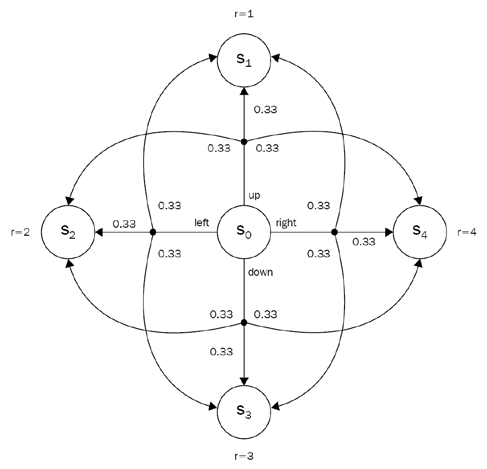
<figure>
<img src="../Imagenes/diagrama_transicion.png" width="400" height="400" align="left"/>
</figure>

Fuente: Maxim Lapan

Esta una simplificación del ambiente frozen lake.

En el diagrama se muestra el diagrama de transición de un ejemplo muy simple que tiene un estado inicial $s_0$ y cuatro estados finales $s_1$ arriba, $s_2$ izquierda,$s_3$ abajo y $s_4$ derecha.

Las recompensas recibidas al llegar a cada estado son el mismo orden 1, 2, 3 y 4.
Cada acción tiene la misma forma probabilística que en frozen lake. Es decir, con 33% de probabilidad se ejecuta la acción decidida por el agente, con 33% se ejecuta la acción lateral a la izquierda de la decidida y con 33% de probabilidad se ejecuta la acción lateral a la derecha.

Por simplicidad asumiremos $\gamma=1$.



Los valores de las acciones para el esto $S_0$ pueden calcularse como siguen. Dado que todos lo demás estados son terminales, podemos asumir que el valor de cada uno de esos estados es la recompensa que entregan. En consecuencia $V_1=1, V_2=2, V_3=0, V_4=4$. En donde el valor de cada una de las acciones para cada posible transición están dada por


$$
\begin{align}
Q(s_0, arriba) &= 0.33V_1 + 0.33V_2 + 0.33V_4 = 0.33*1 + 0.33*2 + 0.33*4 = 2.31\\
Q(s_0, izquierda) &= 0.33V_4 + 0.33V_1 + 0.33V_3 = 0.33*4 + 0.33*1 + 0.33*3 = 1.98\\
Q(s_0, derecha) &= 0.33V_4 + 0.33V_1 + 0.33V_3 = 0.33*4 + 0.33*1 + 0.33*4 = 2.64\\
Q(s_0, abajo) &= 0.33V_3 + 0.33V_2 + 0.33V_4 = 0.33*3 + 0.33*2 + 0.33*4 = 2.97
\end{align}
$$


De donde se desprende que el valor del estado es $V(s_0)=2.94$.

Nuestro problema es que en general, las probabilidad de transición son desconocidos. Por eso introducimos el siguiente algoritmo de cálculo del valor de las acciones y los estados, con probabilidades de transición desconocidas

## <span style="color:blue">El método iteración del valor</span>

Este método permite calcular numéricamente el valor de los estados y el valor de las acciones. de un `proceso de decisión de Markov` (PDM), con probabilidades de transición desconocidas.

### Método para estimar el valor de los estados $V(s)$

El procedimiento para el valor de los estados es el siguiente:

1. Inicializa el valor de todos los estados $V$, usualmente en cero.
1. Para cada estado $s$ en el PDM, se ejecuta la actualización de Bellman
$$
V(s) \gets \max_{a} \sum_{s'} p_{a,s\to s'}(r_{s,a} + \gamma V(s'))
$$
1. Se repite el paso 2 un número largo de veces o hasta que los cambios llegan a ser muy pequeños.

### Método para estimar el valor de las acciones  $Q(s,a)$

En el caso de las acciones, es decir, $Q$ se requieren unos cambios menores.

1. Se inicializa todos los $Q_{s,a}$ en cero.
1. Para cada estado $s$, y acción $a$ en este estado, se ejecuta al actualización
$$
Q(s,a) \gets  \sum_{s'} p_{a,s\to s'}(r_{s,a} + \gamma \max_{a'} Q_{s',a'})
$$
1. Repite el paso 2.

Vamos a la práctica. Empezamos con ejemplo muy simple para estimar $Q$ en un ambiente determinístico de acciones.

## <span style="color:blue">Algortimo Q-learning determinístico</span>


En este caso, la acción seleccionado se ejecuta con probabilidad 1. El algoritmo  *Q-Learning* en este caso utiliza la ecuación de Bellman, reescrita de la siguiente forma

$$
Q(s,a) = r_{s,a} + \gamma \max_{a^{'}}  Q(s^{'},a^{'}).
$$

Para este ejemplo se usaran las siguientes estructuras de datos.

1. Una lista numérica con las recompensas de cada estado. 
1. Un lista boolena indicando para cada estado si es terminal o no.
1. La matriz $Q$ que tiene como número de filas el número de estados, y como número de columnas el número de posibles acciones.

### Ejemplo: Entorno de cuadrícula

<figure>
<img src="../Imagenes/cuadricula.png" width="500" height="500" align="center"/>
</figure>


Fuente: Maxim Lapan

1. Si llega al estado de más a la izquierda, el episodio termina y el agente recibe una recompensa de -5. 
2. Por otro lado, si llega al estado de más a la derecha, el episodio termina y el agente recibe una recompensa de +5. 

El agente debe aprender a evitar el estado de -5 y moverse hacia el estado de +5. Si la política que aprende siempre termina en el estado con mayor recompensa, diremos que ha encontrado la **política óptima**(optimal policy).

### El código

Empecemos definiendo nuestro entorno. 

1. Las recompensas son 0 para todos los estados, excepto para el estado de más a la izquierda y el de más a la derecha, que tienen recompensas de -5 y +5 respectivamente. 
2. También definimos una lista que define si un estado es final/terminal o no. 
3. Por último creamos la lista de variables llamada *Q_values*, donde guardaremos los *valores-Q* para todos los pares de estados y acciones.

In [2]:
import numpy as np

state_rewards = [-5, 0, 0, 0, 0, 0, 5]
final_state = [True, False, False, False, False, False, True]
Q_values = [[0.0, 0.0], 
            [0.0, 0.0],
            [0.0, 0.0],
            [0.0, 0.0],
            [0.0, 0.0],
            [0.0, 0.0],
            [0.0, 0.0]] # (s,a) matriz. [izquierda, derecha]

Ahora crearemos una función que escoja una acción usando la política **ε-voraz** para un estado que pasaremos como parámetro.

In [3]:
def select_epsilon_greedy_action(epsilon, state):
    """Toma una acción con probabilidad epsilon, sino toma la mejor acción."""
    result = np.random.uniform()
    if result < epsilon:
        # exploración
        return np.random.randint(0, 2) # acción aleatoria
    else:
        # explotación
        return np.argmax(Q_values[state]) # Acción voraz (greedy)

### Nota

Q_values[state] contiene los Q-values para cada una de las dos acciones. Entonces la función responde con la acción que tiene mayor Q-value para el *state* pasado a la función (que corresponde al estado actual del environment), en el caso de explotación. En el caso de exploración regresa aleatoriamente y con probabilidad epsilon cualquier acción disponible (en este caso alguna de las dos posibles acciones).

También crearemos una función que ejerza de entorno. Le pasaremos el estado y la acción seleccionada por el agente, y nos devolverá la recompensa **r** y el siguiente estado **s’**.


In [4]:
def apply_action(state, action):
    """Aplica la acción seleccionada y obtiene la recompensa y el siguiente estado."""
    if action == 0:
        next_state = state-1
    else:
        next_state = state+1
    
    return state_rewards[next_state], next_state

Por último, decidimos varios hiperparámetros y ejecutamos el algoritmo que aprende usando el algoritmo de *Q-Learning* y la *ecuación de Bellman*.


In [ ]:
num_episodes = 1000
epsilon = 0.2
discount = 0.9 # 

for episode in range(num_episodes+1):
    initial_state = 3 # estado en el medio
    state = initial_state
    while not final_state[state]: # corre hasta el final del episodio
        # el agente selecciona una acción
        action = select_epsilon_greedy_action(epsilon, state)
        # se informa la acción al ambiente
        # el ambiente cambia su estado
        # regresa al recompensa y el siguiente estado
        reward, next_state = apply_action(state, action)
        # mejora los Q-values con la ecuación de  Bellman
        if final_state[next_state]:
            Q_values[state][action] = reward
        else:
            Q_values[state][action] = reward + discount * max(Q_values[next_state])
        state = next_state
        # print
        print('episode: ', episode, 'Q_values:', Q_values)
         
# Imprime los valores Q para ver si la acción a la derecha es siempre mejor que la acción a la izquierda
# excepto para los estados 0 y 6, que son estados terminales y no puede tomar
# cualquier acción de ellos, por lo que no importa.
print('los Q-values son:')
print(Q_values)
action_dict = {0:'izquierda', 1:'derecha'}
state = 0

for Q_vals in Q_values:
    print('La mejor acción para el estado {} es {}'.format(state, 
                                             action_dict[np.argmax(Q_vals)]))
    state += 1

Al terminar, observamos los *valores-Q* aprendidos y la mejor acción para cada estado. Al ejecutarlo vemos que ha aprendido exactamente lo que queríamos, la política óptima, a moverse hacia la derecha siempre. Hay que tener en cuenta que los *valores-Q* han sido descontados por el factor de descuento, que en este caso es 0.9. Los estados de la derecha y la izquierda tienen valores de 0.0 porque son terminales y el episodio termina al llegar a ellos.

### Ejercicio

Transforme este código para funcione de manera similar a un ambiente gym.

## <span style="color:blue">Método de iteración de valores en práctica</span>

Para terminar la lección vamos a desarrollar un ejemplo completo de los dos métodos descritos. Haremos una implementación completa con el ambiente *frozen-lake*.

### Método para estimar el valor de los estados.

* **Tabla de recompensas**. Un diccionario que tiene una llave compuesta (estado fuente, acción, estado destino). El valor contiene la recompensa inmediata.
* **Tabla de transiciones**. Un diccionario que contiene el conteo de las tras transiciones experimentadas por el agente. La clave es (estado, acción) y el valor es otro diccionario que almacena el número de veces que un estado destino ha sido visitado desde el estado fuente. Por ejemplo si la clave es $(0, 1)$, indica estado inicial = 0 y acción = 1.  Si por ejemplo desde el estado 0 se ha ejecutado la acción 1, digamos 10 veces, el valor para esta clave podría ser \{4: 3, 5: 7 \} que indicaría que de las 10 veces se llegó en 3 ocasiones al estado 4 y en 7 ocasiones al estado 5.
* **Tabla de valores**. Una tabla que almacena el valor calculado para cada estado.

### Lógica general de la implementación

1. Primero se ejecutan 100 pasos aleatorios desde el ambiente. Es decir, se obtienen 100 acciones de forma aleatoria del ambiente. Las tablas de recompensa y transición se poblan a partir de la información recibida del ambiente en estos 100 pasos aleatorios. La función *play_n_random_steps* es la encarga de hacer esta tarea.
1. Al finalizar la primera etapa se corre una iteración para actualizar la tabla valor. 
1. Se ejecutan varios episodios completos usando la tabla actualizada de valor para chequear las mejoras. Si la recompensa promedio para esos episodios de test está por encima de 0.8 terminamos el entrenamiento. Durante estos episodios de test se actualizan las tablas de recompensa y transiciones.

A continuación describimos los principales componentes de nuestra implementación.

#### Clase Agent

Definimos la clase *Agent* que contiene las tablas que usaremos y los métodos que realizaran las tareas. El constructor de la clase crea las tablas, el ambiente y la variable que contendrá el estado actual.

#### Método play_n_random_steps

Esta es la función que genera datos de experiencia para el agente. En la función se generan n (=100) acciones desde el ambiente en forma aleatoria y se poblan y actualizan las tablas de recompensa y transición. Es interesante anotar que el método no espera el final de un episodio. Si llega al final del episodio actual, simplemente inicia le siguiente episodio sin reiniciar las tablas. Esta es una diferencia importante con el método de entropía cruzada.

### Método calc_action_value 

Este método hace el cálculo del valor de la acción $a$  desde el estado $s$.

La siguiente imagen ilustra la lógica del cálculo de una acción empezando en el estado $s$. Por facilidad suponemos que solamente se llega a los estados $s_1$ y $s_2$. El cálculo involucra las tablas de transición, recompensa y valor.

<figure>
<img src="../Imagenes/state_value.png" width="600" height="600" align="center"/>
</figure>


Fuente: Maxim Lapan

El método hace lo siguiente:

1. Extracta la información de los contadores incluidos en en la tabla de transición. `Counters` es una colección tiene una forma de diccionario con los estados destinos como clave y el conteo de las veces que el agente llegó allí (desde el estado $s$ con la acción $a$). La función suma todas las frecuencias de Counter para normalizar los conteos y estimar la probabilidad de llegar a a cada estado.
1. La función itera sobre todos estos estados destino  que la acción alcanza  y calcula su contribución al valor total de la acción usando la ecuación de Bellman. Esta contribución es: la recompensa inmediata más el valor descontado ($\gamma V(s_i)$) del estado destino. 

#### Método select_action

Este método permite seleccionar la mejor acción a partir de un estado $s$. La acción con mayor ganancia posible es seleccionada. Esta selección es determinista. Este método es de tipo ambicioso (greedy)

#### Método *play_episodio*

El método ejecuta un episodio completo usando el correspondiente ambiente. Para no generar un desorden con el actual estado del ambiente definido en la clase, se genera un ambiente de prueba (test) que es pasado al método como argumento. La lógica es muy simple. Ejecuta el ciclo del episodio, seleccionado en cada paso la mejor acción disponible y acumulando la recompensa  del episodio.

### Método value_iteration

Nuestro método final y por supuesto más importante, es *value_iteration*. Este método es sorprendentemente simple gracias a las métodos descritos arriba. El método recorre todos los estados del ambiente.

Para cada estado calcula el valor para los estados alcanzables a partir de él, obteniendo candidatos para el valor del estado. AL finalizar se actualiza el valor del estado con el máximo valor de la acción disponible desde el estado.

### Ciclo de entrenamiento

Llegamos a la pieza final del código, que es el ciclo de entrenamiento.

Antes del ciclo de entrenamiento se ejecutan las siguientes tareas.

1. Se instancia un agente, un ambientes (de prueba) y el writer para Tensorboard.
1. Se inicializa la mejor recompensa  y el número de iteraciones.

Dentro del ciclo se ejecutan las siguientes acciones.

1. Se ejecutan n=100 pasos aleatorios para ganar experiencia con el ambiente y poblar las tablas de recompensa y transición con datos frescos.
1. Con base en esta información se corre una iteración para calcular el valor de los estados.
1. Se corre un conjunto de episodios de prueba (*TEST_EPISODES = 20*)utilizando la tabla de valores actualizada arriba como la política del agente y se escribe en el writer las cantidades que se desea seguir: la recompensa promedio  y el número de iteraciones.

### Ejercicio

Por favor revise, reescriba, corra y analice los resultados. Asegúrese de entender todos los detalles.

In [2]:
#!/usr/bin/env python3
import gym
import collections
from torch.utils.tensorboard import SummaryWriter

ENV_NAME = "FrozenLake-v1"
#ENV_NAME = "FrozenLake8x8-v1"      # uncomment for larger version
GAMMA = 0.9
TEST_EPISODES = 20


class Agent:
    def __init__(self):
        self.env = gym.make(ENV_NAME)
        self.state = self.env.reset()
        self.rewards = collections.defaultdict(float)
        self.transits = collections.defaultdict(
            collections.Counter)
        self.values = collections.defaultdict(float)

    def play_n_random_steps(self, count):
        for _ in range(count):
            action = self.env.action_space.sample()
            new_state, reward, is_done, _ = self.env.step(action)
            self.rewards[(self.state, action, new_state)] = reward
            self.transits[(self.state, action)][new_state] += 1
            self.state = self.env.reset() \
                if is_done else new_state

    def calc_action_value(self, state, action):
        target_counts = self.transits[(state, action)]
        total = sum(target_counts.values())
        action_value = 0.0
        for tgt_state, count in target_counts.items():
            reward = self.rewards[(state, action, tgt_state)]
            val = reward + GAMMA * self.values[tgt_state]
            action_value += (count / total) * val
        return action_value

    def select_action(self, state):
        best_action, best_value = None, None
        for action in range(self.env.action_space.n):
            action_value = self.calc_action_value(state, action)
            if best_value is None or best_value < action_value:
                best_value = action_value
                best_action = action
        return best_action

    def play_episode(self, env):
        total_reward = 0.0
        state = env.reset()
        while True:
            action = self.select_action(state)
            new_state, reward, is_done, _ = env.step(action)
            self.rewards[(state, action, new_state)] = reward
            self.transits[(state, action)][new_state] += 1
            total_reward += reward
            if is_done:
                break
            state = new_state
        return total_reward

    def value_iteration(self):
        for state in range(self.env.observation_space.n):
            state_values = [
                self.calc_action_value(state, action)
                for action in range(self.env.action_space.n)
            ]
            self.values[state] = max(state_values)


if __name__ == "__main__":
    test_env = gym.make(ENV_NAME)
    agent = Agent()
    writer = SummaryWriter(comment="-v-iteration")

    iter_no = 0
    best_reward = 0.0
    while True:
        iter_no += 1
        agent.play_n_random_steps(100)
        agent.value_iteration()

        reward = 0.0
        for _ in range(TEST_EPISODES):
            reward += agent.play_episode(test_env)
        reward /= TEST_EPISODES
        writer.add_scalar("reward", reward, iter_no)
        if reward > best_reward:
            print("Best reward updated %.3f -> %.3f" % (
                best_reward, reward))
            best_reward = reward
        if reward > 0.80:
            print("Solved in %d iterations!" % iter_no)
            break
    writer.close()


Best reward updated 0.000 -> 0.100
Best reward updated 0.100 -> 0.350
Best reward updated 0.350 -> 0.450
Best reward updated 0.450 -> 0.600
Best reward updated 0.600 -> 0.700
Best reward updated 0.700 -> 0.800
Best reward updated 0.800 -> 0.900
Solved in 48 iterations!


### Conclusiones

Hay varias diferencias notables en relación con el método de entropía cruzada.

1. Este método es esencialmente aleatorio en naturaleza. Se corren episodios puramente aleatorios para recoger información acerca de la recompensa y transición entre estados siguiendo distintas acciones.
1. No se espera el final de los episodios en la parte de test. Simplemente se va recibido la recompensa de cada episodio, que siempre es 1 o 0 y se continua hasta terminar el ciclo de test.
1. El valor de los estados se obtiene a partir de la exploración aleatoria que hace el agente. 

## <span style="color:blue">Método de iteración de acciones en práctica</span> 

El método Q-learning tiene pequeños cambios en relación con el método del valor. La siguiente es la relación de cambios.

1. El cambio más importante en las estructuras de datos es en la tabla valor. Ahora necesitamos almacenar los valores de la Q funcipon como hicimos antes en el ejemplo simpl de la cuadrícula. Ahora el diccionario tiene una clave compuesta (estado, acción).
1. La segunda diferencia importante es que ahora el método *calc_action_value* ya no se necesita porque los valores de las acciones se almacenan en la tabla de valores Q.
1. Finalmente el cambio más importante es en el método *value_action*. Antes, era solo una envoltura alrededor de la llamada calc_action_value (), que hizo el trabajo de aproximación de Bellman. Ahora, como esta función se ha ido y ha sido reemplazado por una tabla valor (Q), necesitamos hacer la aproximación en el método  *value_iteration*.

### Ejercicio

Por favor revise escriba y corra el siguiete código que implementa el método Q-learnig. Identifique los cambios en relación con el código anterior.

In [3]:
#!/usr/bin/env python3
import gym
import collections
from torch.utils.tensorboard import SummaryWriter

ENV_NAME = "FrozenLake-v1"
#ENV_NAME = "FrozenLake8x8-v0"      # uncomment for larger version
GAMMA = 0.9
TEST_EPISODES = 20


class Agent:
    def __init__(self):
        self.env = gym.make(ENV_NAME)
        self.state = self.env.reset()
        self.rewards = collections.defaultdict(float)
        self.transits = collections.defaultdict(collections.Counter)
        self.values = collections.defaultdict(float)

    def play_n_random_steps(self, count):
        for _ in range(count):
            action = self.env.action_space.sample()
            new_state, reward, is_done, _ = self.env.step(action)
            self.rewards[(self.state, action, new_state)] = reward
            self.transits[(self.state, action)][new_state] += 1
            self.state = self.env.reset() if is_done else new_state

    def select_action(self, state):
        best_action, best_value = None, None
        for action in range(self.env.action_space.n):
            action_value = self.values[(state, action)]
            if best_value is None or best_value < action_value:
                best_value = action_value
                best_action = action
        return best_action

    def play_episode(self, env):
        total_reward = 0.0
        state = env.reset()
        while True:
            action = self.select_action(state)
            new_state, reward, is_done, _ = env.step(action)
            self.rewards[(state, action, new_state)] = reward
            self.transits[(state, action)][new_state] += 1
            total_reward += reward
            if is_done:
                break
            state = new_state
        return total_reward

    def value_iteration(self):
        for state in range(self.env.observation_space.n):
            for action in range(self.env.action_space.n):
                action_value = 0.0
                target_counts = self.transits[(state, action)]
                total = sum(target_counts.values())
                for tgt_state, count in target_counts.items():
                    key = (state, action, tgt_state)
                    reward = self.rewards[key]
                    best_action = self.select_action(tgt_state)
                    val = reward + GAMMA * \
                          self.values[(tgt_state, best_action)]
                    action_value += (count / total) * val
                self.values[(state, action)] = action_value


if __name__ == "__main__":
    test_env = gym.make(ENV_NAME)
    agent = Agent()
    writer = SummaryWriter(comment="-q-iteration")

    iter_no = 0
    best_reward = 0.0
    while True:
        iter_no += 1
        agent.play_n_random_steps(100)
        agent.value_iteration()

        reward = 0.0
        for _ in range(TEST_EPISODES):
            reward += agent.play_episode(test_env)
        reward /= TEST_EPISODES
        writer.add_scalar("reward", reward, iter_no)
        if reward > best_reward:
            print("Best reward updated %.3f -> %.3f" % (best_reward, reward))
            best_reward = reward
        if reward > 0.80:
            print("Solved in %d iterations!" % iter_no)
            break
    writer.close()


Best reward updated 0.000 -> 0.550
Best reward updated 0.550 -> 0.650
Best reward updated 0.650 -> 0.700
Best reward updated 0.700 -> 0.750
Best reward updated 0.750 -> 0.900
Solved in 25 iterations!
